# Example Notebook

This notebook demonstrates a simple data-science workflow.
We will generate synthetic data, do some statistics, and visualise the relationships.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# allows plots created with matplotlib to be displayed directly below the code cells
%matplotlib inline

In [14]:
# generate synthetic dataset
np.random.seed(42)
n_samples = 1000

# two correlated features
feature1 = np.random.normal(loc=0, scale=1, size=n_samples)
feature2 = 0.42 * feature1 + np.random.normal(scale=0.5, size=n_samples)
# unrelated feature
feature3 = np.random.normal(loc=2, scale=.42, size=n_samples)

# target variable
target = 3 * feature1 - 2 * feature2 + np.random.normal(scale=1.0, size=n_samples)

# create dataframe
df = pd.DataFrame({
    "feature1": feature1,
    "feature2": feature2,
    "feature3": feature3,
    "target": target,
})

In [15]:
# Basic descriptive statistics
display(df.describe())

,feature1,feature2,feature3,target
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.019332,0.043538,2.002450,-0.047798
std,0.979216,0.633482,0.413051,2.597740
min,-3.241267,-1.885156,0.731805,-8.444508
25%,-0.647590,-0.339682,1.727840,-1.889355
50%,0.025301,0.016387,1.999895,-0.136444
75%,0.647944,0.451153,2.277584,1.881042
max,3.852731,2.492936,3.649020,8.691465


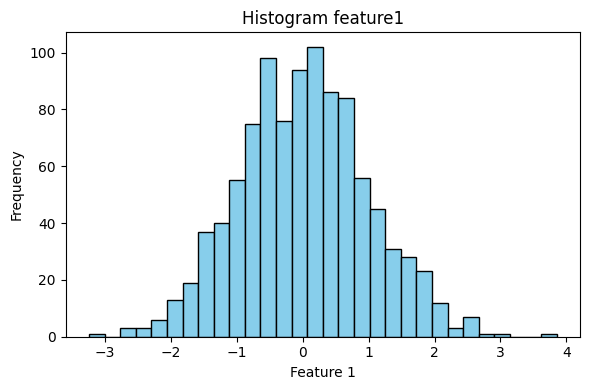

In [16]:
# Histogram of feature1

plt.figure(figsize=(6,4))
plt.hist(df["feature1"], bins=30, color="skyblue", edgecolor="k")
plt.title("Histogram feature1")
plt.xlabel("Feature 1")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

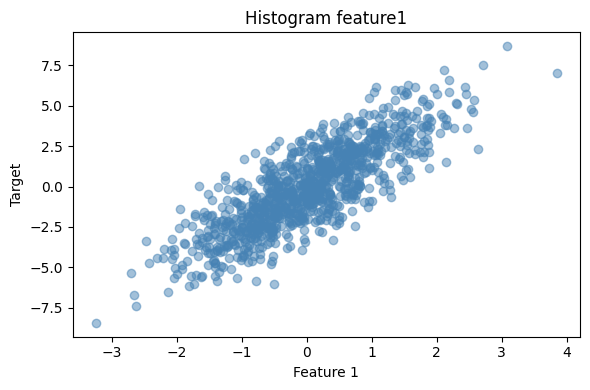

In [17]:
# Scatter plot: feature1 vs target

plt.figure(figsize=(6,4))
plt.scatter(df["feature1"], df["target"], alpha=0.5, color="steelblue")
plt.title("Histogram feature1")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.tight_layout()
plt.show()

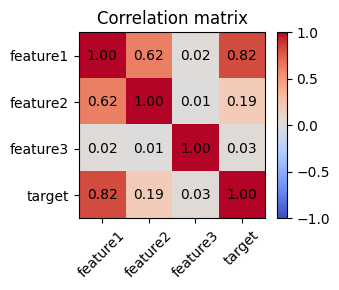

In [18]:
# Correlation heatmap
corr = df.corr()

plt.figure(figsize=(4,3))
cax = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(cax, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center", color="black")
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()